Problem statement

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team.
To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
Requirement/Constraint: There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

Reading the data

In [2]:
df=pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Finding the shape of dataset along with statistical and characteristic info

In [4]:
df.shape

(18207, 60)

In [5]:
df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

Dropping certain columns which are not required for data analysis

In [7]:
df.drop(columns=['Photo','Flag','Club Logo'], axis=1, inplace=True)

In [8]:
df.drop('Jersey Number', axis=1, inplace=True)

Since 93% of data is null in Loaned From column, data is dropped.

In [9]:
df.drop('Loaned From', axis=1, inplace=True)

In [10]:
df.shape

(18207, 55)

Finding null values in columns

In [11]:
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Accelerati

In [12]:
df.columns[df.isnull().sum()!=0]

Index(['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

Converting some categorical variables to numerical and vice versa

    1.Stripping the symbols

In [13]:
df['Value']=df.Value.apply(lambda x: str(x).lstrip('€'))

In [14]:
df['Wage']=df.Wage.apply(lambda x: str(x).lstrip('€'))

In [15]:
df['Release Clause']=df['Release Clause'].apply(lambda x: str(x).lstrip('€'))

In [16]:
print(df.Value.head())
print(df.Wage.head())
print(df['Release Clause'].head())

0    110.5M
1       77M
2    118.5M
3       72M
4      102M
Name: Value, dtype: object
0    565K
1    405K
2    290K
3    260K
4    355K
Name: Wage, dtype: object
0    226.5M
1    127.1M
2    228.1M
3    138.6M
4    196.4M
Name: Release Clause, dtype: object


COnverting the M and K values to float

In [17]:
def convert(x):
    if 'K' in x:
        if len(x)>1:
            return float(x.replace('K',''))*1000
        return 1000.0
    if 'M' in x:
        if len(x)>1:
            return float(x.replace('M',''))*1000000
        return 10000000.0

In [18]:
df.Value=df.Value.apply(convert)
df.Wage=df.Wage.apply(convert)
df['Release Clause']=df['Release Clause'].apply(convert)

In [19]:
print(df.Value.head())
print(df.Wage.head())
print(df['Release Clause'].head())

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64
0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64
0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64


Converting Joined column to int with only year

In [21]:
df2=df.Joined.apply(lambda a: str(a).split(','))

In [22]:
listing=[]
for i in df2.values:
    if len(i)>1:
        b=str(i[1]).lstrip()
        listing.append(b)
    else:
        listing.append(np.nan)

In [23]:
#del listing- if appended wrong values

In [24]:
df['Joined']= listing

In [25]:
df.Joined=df.Joined.astype(float)

In [26]:
df.Joined.dtype

dtype('float64')

Converting Contract weight variable to float

In [27]:
df['Weight']=df['Weight'].apply(lambda a:str(a).rstrip('lbs'))

In [28]:
df['Weight']=df['Weight'].astype(float)

In [29]:
df.Weight.head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

Converting height to cms in float

In [30]:
df.Height.fillna(np.nan, inplace=True)

In [31]:
df3=df.Height.apply(lambda a:str(a).split("'"))
lst=[]
for i in df3.values:
    if len(i)>1:
        a=float(i[0])*30.48
        b=float(i[1])*2.54
        lst.append(round(a+b,2))
    else:
        lst.append(np.nan)

In [32]:
df['Height']=lst
df.Height.head()

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height, dtype: float64

In [45]:
#del lst- if appended wrong values

In [33]:
df2=df['Contract Valid Until'].apply(lambda x: str(x).split(","))

In [34]:
lst1=[]
for i in df2.values:
    if len(i)==1:
        lst1.append(i[0])
    elif len(i)>1:
        lst1.append(i[1].lstrip())
    else:
        lst1.append(np.nan)
        
        
#del lst1-if appended wrong values

In [35]:
df['Contract Valid Until']=lst1

In [36]:
df['Contract Valid Until']=df['Contract Valid Until'].astype(float)
df['Contract Valid Until'].dtype

dtype('float64')

In [37]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Joined                      float64
Contract Valid Until        float64
Height                      float64
Weight                      float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  

heatmap to view missing values

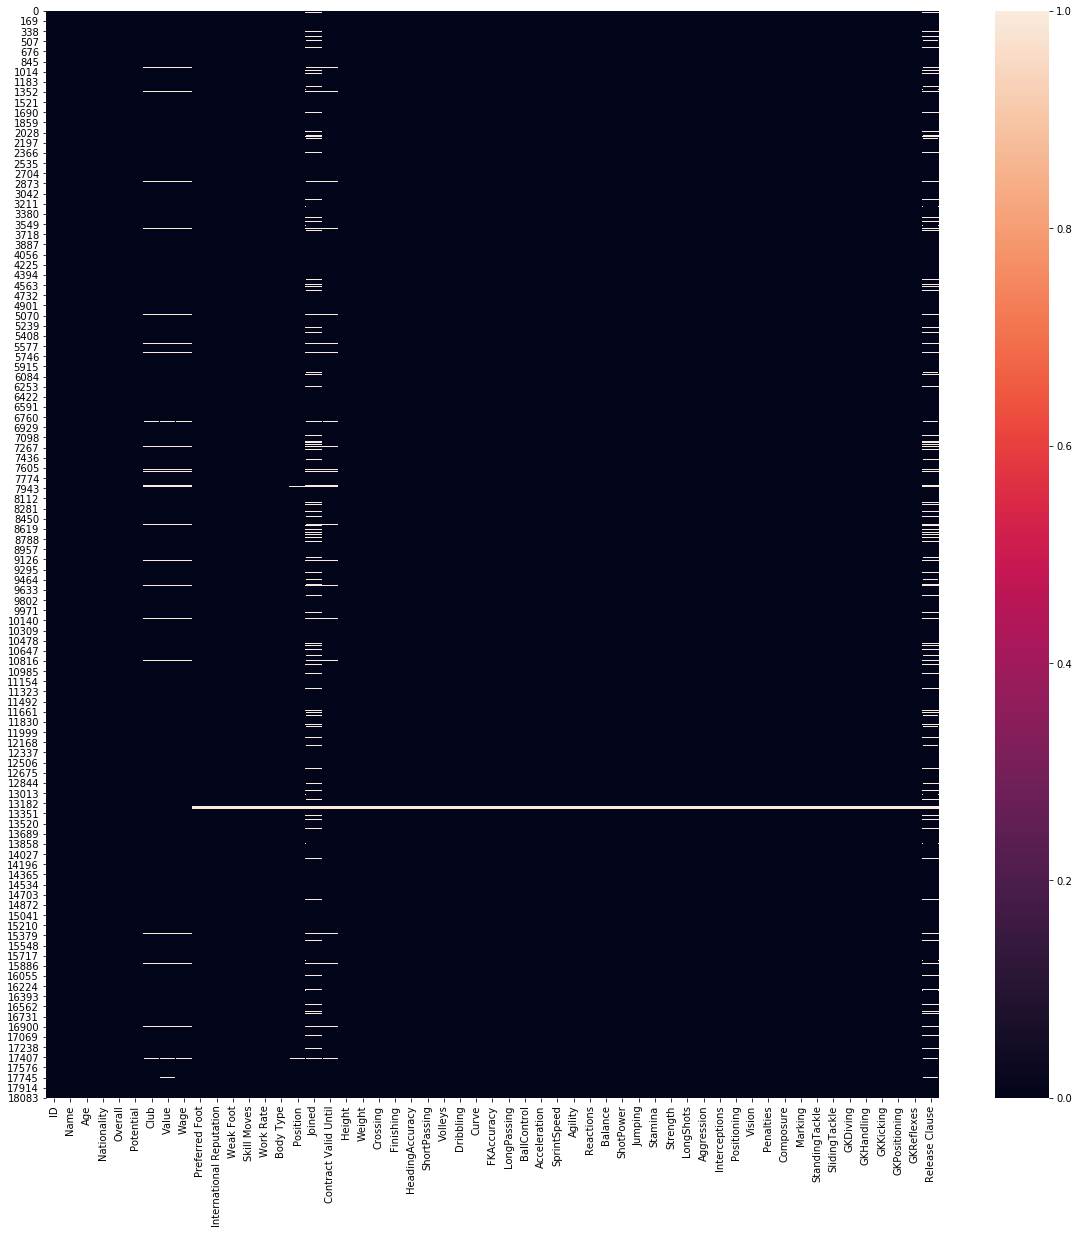

In [36]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.isnull())

In [38]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Joined                      float64
Contract Valid Until        float64
Height                      float64
Weight                      float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  

In [39]:
df.columns[df.isnull().sum()!=0]

Index(['Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

Filling up missing values

In [40]:
df.Club.fillna('No Club', inplace=True)
df.Value.fillna(df.Value.median(), inplace=True)
df.Wage.fillna(df.Wage.median(), inplace=True)
df.Height.fillna(df.Height.median(), inplace =True)
df.Weight.fillna(df.Weight.median(), inplace=True)
df['International Reputation'].fillna(df['International Reputation'].mean(), inplace=True)
df['Weak Foot'].fillna(df['Weak Foot'].mean(), inplace=True)
df['Skill Moves'].fillna(df['Skill Moves'].mean(), inplace=True)
df['Joined'].fillna(df['Joined'].median(), inplace=True)
df['Contract Valid Until'].fillna(df['Contract Valid Until'].median(), inplace=True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace=True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace=True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace=True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace=True)
df['BallControl'].fillna(df['BallControl'].median(), inplace=True)
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace=True)
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(), inplace=True)
df['Agility'].fillna(df['Agility'].mean(), inplace=True)
df['Reactions'].fillna(df['Reactions'].mean(), inplace=True)
df['Balance'].fillna(df['Balance'].mean(), inplace=True)
df['ShotPower'].fillna(df['ShotPower'].mean(), inplace=True)
df['Jumping'].fillna(df['Jumping'].mean(), inplace=True)
df['Stamina'].fillna(df['Stamina'].median(), inplace=True)
df['Strength'].fillna(df['Strength'].mean(), inplace=True)
df['LongShots'].fillna(df['LongShots'].mean(), inplace=True)
df['Aggression'].fillna(df['Aggression'].mean(), inplace=True)
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace=True)
df['Positioning'].fillna(df['Positioning'].median(), inplace=True)
df['Vision'].fillna(df['Vision'].mean(), inplace=True)
df['Penalties'].fillna(df['Penalties'].mean(), inplace=True)
df['Composure'].fillna(df['Composure'].mean(), inplace=True)
df['Marking'].fillna(df['Marking'].mean(), inplace=True)
df['StandingTackle'].fillna(df['StandingTackle'].median(), inplace=True)
df['SlidingTackle'].fillna(df['SlidingTackle'].mean(), inplace=True)
df['GKDiving'].fillna(df['GKDiving'].mean(), inplace=True)
df['GKKicking'].fillna(df['GKKicking'].mean(), inplace=True)
df['GKHandling'].fillna(df['GKHandling'].mean(), inplace=True)
df['GKPositioning'].fillna(df['GKPositioning'].mean(), inplace=True)
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace=True)
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace=True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace=True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace=True)
df['Curve'].fillna(df['Curve'].mean(), inplace=True)
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace=True)
df['Release Clause'].fillna(df['Release Clause'].max(),inplace=True)

FIlling the values based on maximum counts

In [41]:
print(df['Preferred Foot'].value_counts())
df['Preferred Foot'].fillna('Right', inplace=True)

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64


In [42]:
print(df['Work Rate'].value_counts())
df['Work Rate'].fillna('Medium/ Medium', inplace=True)

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64


In [43]:
print(df['Body Type'].value_counts())
df['Body Type'].fillna('Normal', inplace=True)

Normal                 10595
Lean                    6417
Stocky                  1140
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Courtois                   1
C. Ronaldo                 1
Neymar                     1
Messi                      1
Name: Body Type, dtype: int64


In [44]:
print(df['Position'].value_counts())
df['Position'].fillna('ST', inplace=True)

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64


Checking if there are any null values left

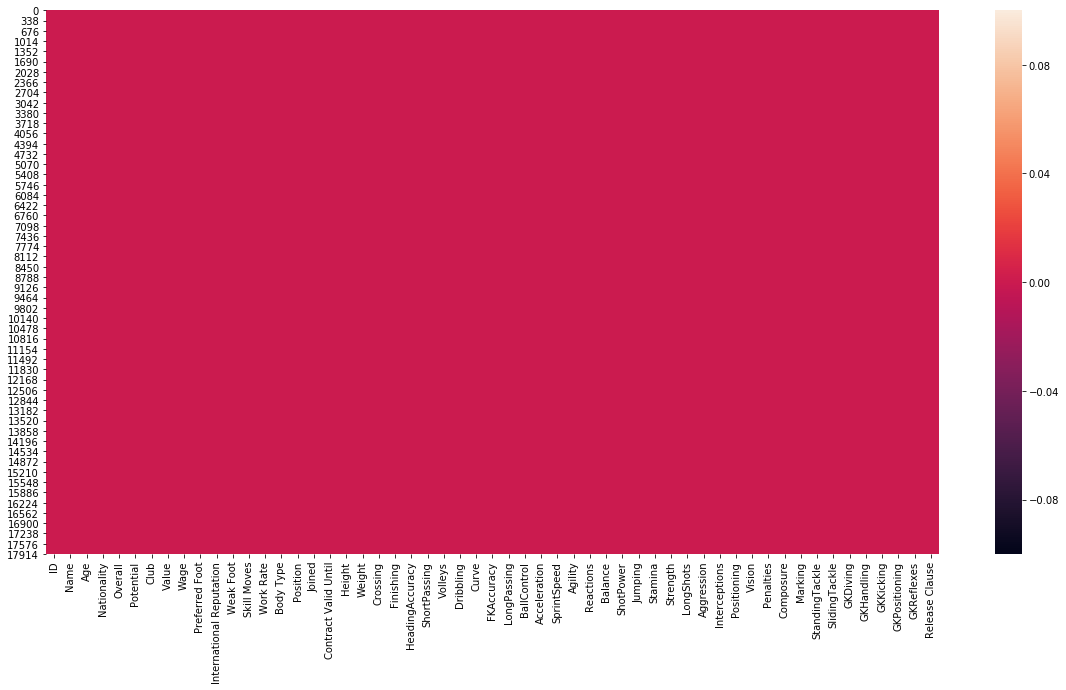

In [46]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.isnull())

# Some questions which are answered

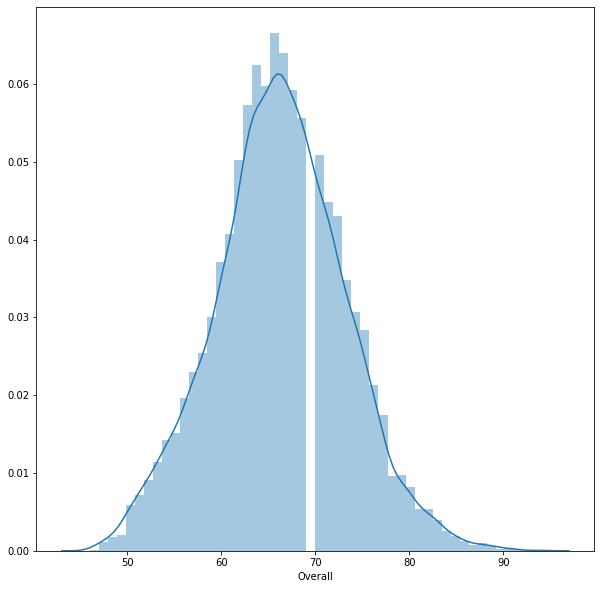

In [51]:
'''1.	Plot the distribution of Overall rating for all players'''
plt.subplots(figsize=(10,10))
sns.distplot(df.Overall)

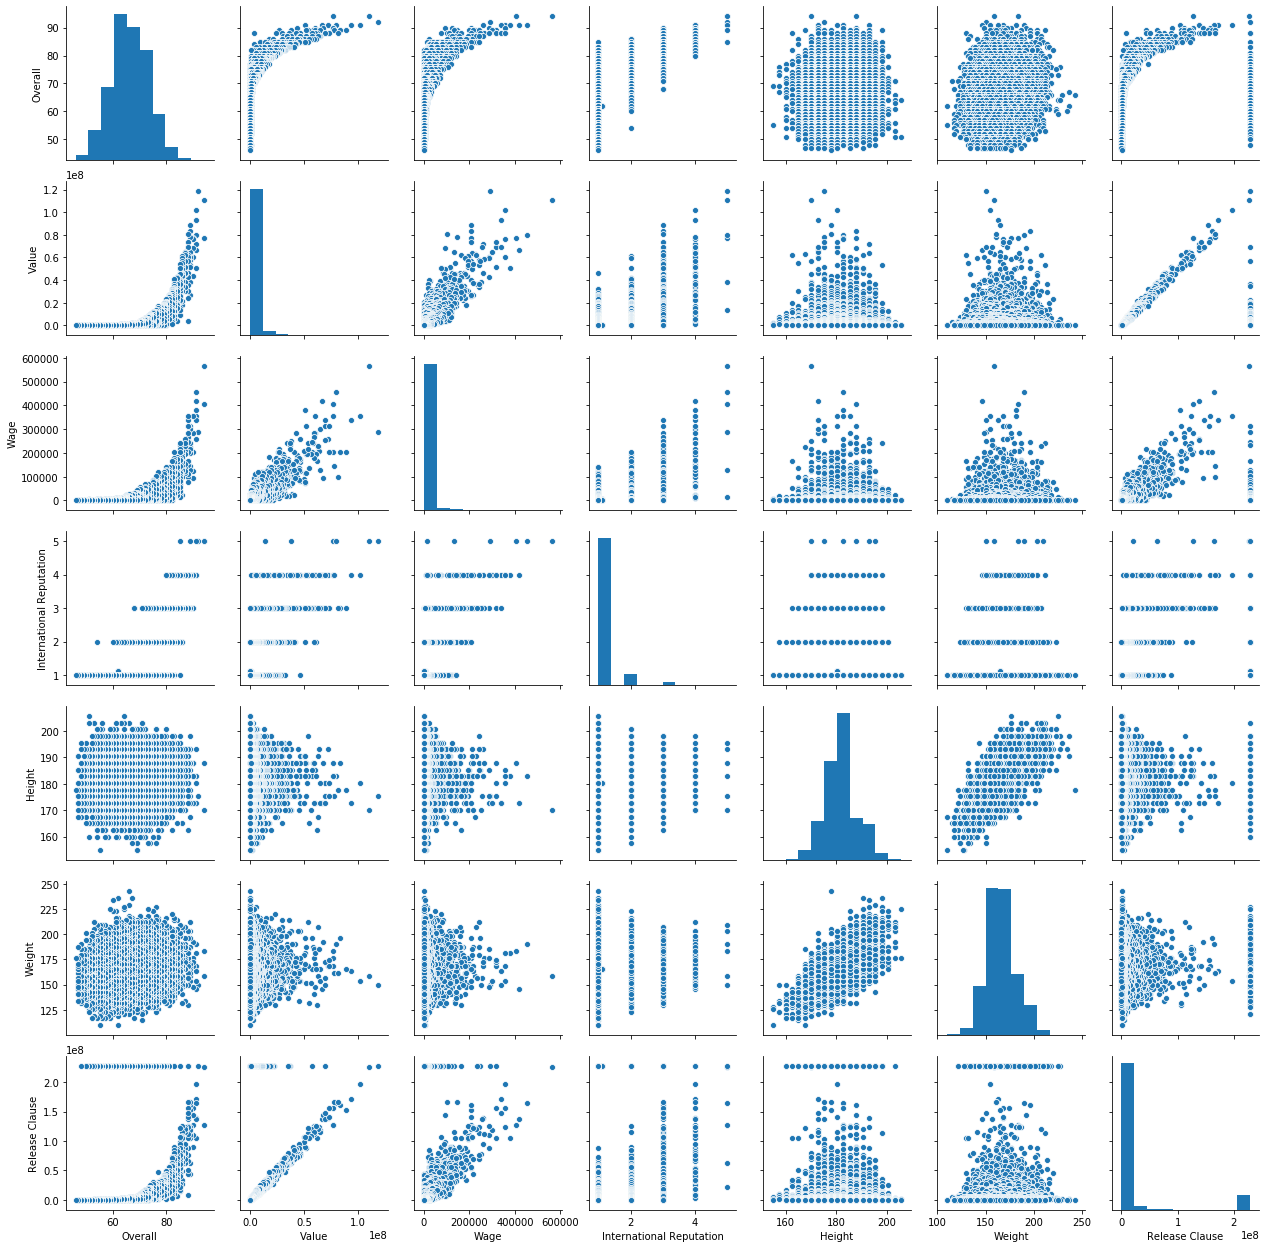

In [52]:
'''2.	Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause'''

sns.pairplot(df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])

    Contract Valid Until  Overall
3                 2020.0       91
5                 2020.0       91
6                 2020.0       91
8                 2020.0       91
13                2020.0       90
21                2020.0       89
24                2020.0       89
31                2020.0       88
39                2020.0       88
46                2020.0       87
49                2020.0       87
50                2020.0       87
52                2020.0       87
64                2020.0       86
71                2020.0       86
73                2020.0       86
75                2020.0       86
80                2020.0       85
90                2020.0       85
98                2020.0       85


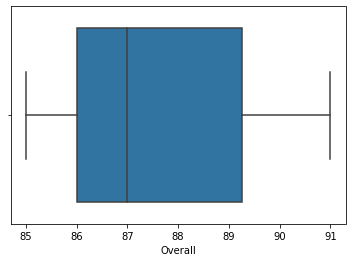

In [61]:
'''3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020'''
data=df[df['Contract Valid Until']==2020]
print(data[:20][['Contract Valid Until','Overall']])
sns.boxplot(data[:20]['Overall'])

205150.0


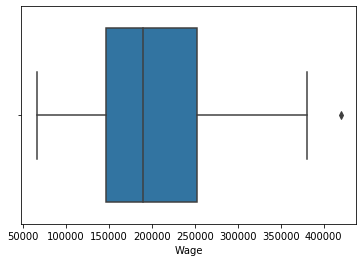

In [59]:
'''a)	What would the average wage for this set of players be?'''
print(data[:20]['Wage'].mean())
sns.boxplot(data[:20]['Wage'])

29.95


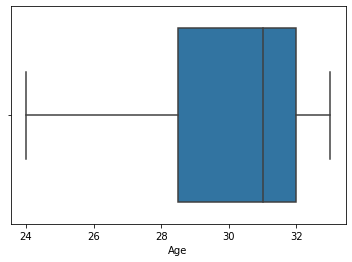

In [67]:
'''b)	What is the average age?'''
print(data[:20]['Age'].mean())
sns.boxplot(data[:20]['Age'])

In [68]:
'''c)	Is there a correlation between the Overall rating and Value for these players?'''
print(data[:20]['Overall'].corr(data[:20]['Value']))

0.6667878068079502


In [69]:
'''4.	Generate tables containing the top 5 players by Overall rating for each unique position.'''
l=[]
w=[]
dfPos=df.Position.value_counts()
for i in dfPos.index:
    data=df.groupby('Position').get_group(i)[['Position','Name','Overall','Wage']]
    names=data.Name[:5]
    wage=data.Wage[:5].mean()
    w.append(wage)
    l.append(list(names.values))
    print(data[:5])

   Position               Name  Overall      Wage
1        ST  Cristiano Ronaldo       94  405000.0
10       ST     R. Lewandowski       90  205000.0
16       ST            H. Kane       89  205000.0
23       ST          S. Agüero       89  300000.0
36       ST            G. Bale       88  355000.0
   Position           Name  Overall      Wage
3        GK         De Gea       91  260000.0
9        GK       J. Oblak       90   94000.0
18       GK  M. ter Stegen       89  240000.0
19       GK    T. Courtois       89  240000.0
22       GK       M. Neuer       89  130000.0
    Position         Name  Overall      Wage
12        CB     D. Godín       90  125000.0
42        CB    S. Umtiti       87  205000.0
73        CB   M. Benatia       86  160000.0
89        CB  N. Otamendi       85  170000.0
102       CB        Naldo       85   38000.0
    Position                 Name  Overall      Wage
67        CM               Thiago       86  130000.0
78        CM  S. Milinković-Savić       85   730

In [70]:
'''a)	Are there any players appearing in more than one Table. Please point out such players.'''
l1=[]
for i in l:
    for j in i:
        l1.append(j)
print(l1, end=' ')
df1=pd.DataFrame(l1)
df1.duplicated(subset=None, keep='first')

['Cristiano Ronaldo', 'R. Lewandowski', 'H. Kane', 'S. Agüero', 'G. Bale', 'De Gea', 'J. Oblak', 'M. ter Stegen', 'T. Courtois', 'M. Neuer', 'D. Godín', 'S. Umtiti', 'M. Benatia', 'N. Otamendi', 'Naldo', 'Thiago', 'S. Milinković-Savić', 'Jorginho', 'I. Gündoğan', 'N. Keïta', 'Marcelo', 'Jordi Alba', 'Alex Sandro', 'D. Alaba', 'Filipe Luís', 'Azpilicueta', 'Carvajal', 'K. Walker', 'Sergi Roberto', 'L. Bender', 'K. Mbappé', 'M. Salah', 'F. Thauvin', 'José Callejón', 'A. Di María', 'P. Aubameyang', 'S. Mané', 'Douglas Costa', 'M. Reus', 'Koke', 'A. Griezmann', 'C. Eriksen', 'Roberto Firmino', 'T. Müller', 'M. Özil', 'Sergio Busquets', 'Casemiro', 'M. Pjanić', 'Fernandinho', 'Fabinho', 'Sergio Ramos', 'Thiago Silva', 'Piqué', 'R. Varane', 'L. Bonucci', 'G. Chiellini', 'M. Hummels', 'K. Koulibaly', 'J. Vertonghen', 'V. van Dijk', 'T. Kroos', 'David Silva', 'M. Hamšík', 'M. Verratti', 'Bruno Fernandes', 'K. De Bruyne', 'L. Modrić', 'I. Rakitić', 'J. Kimmich', 'Saúl', 'Neymar Jr', 'L. Insigne

0      False
1      False
2      False
3      False
4      False
       ...  
130    False
131    False
132    False
133    False
134    False
Length: 135, dtype: bool

Average wage for  ST is 294000.0
Average wage for  GK is 192800.0
Average wage for  CB is 139600.0
Average wage for  CM is 130600.0
Average wage for  LB is 177200.0
Average wage for  RB is 155400.0
Average wage for  RM is 131400.0
Average wage for  LM is 164600.0
Average wage for  CAM is 174000.0
Average wage for  CDM is 217000.0
Average wage for  RCB is 231000.0
Average wage for  LCB is 162000.0
Average wage for  LCM is 184400.0
Average wage for  RCM is 240800.0
Average wage for  LW is 261000.0
Average wage for  RW is 202000.0
Average wage for  RDM is 105000.0
Average wage for  LDM is 126600.0
Average wage for  LS is 130200.0
Average wage for  RS is 132200.0
Average wage for  RWB is 44200.0
Average wage for  LWB is 34200.0
Average wage for  CF is 47400.0
Average wage for  LAM is 81600.0
Average wage for  RAM is 45400.0
Average wage for  RF is 148000.0
Average wage for  LF is 121200.0


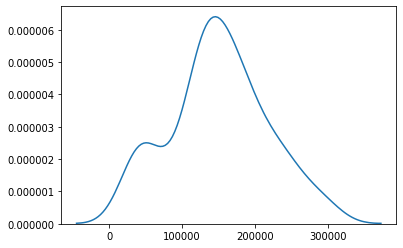

In [71]:
'''b)	What is the average wage one can expect to pay for the top 5 in every position?'''
j=0
for i in dfPos.index:
    print("Average wage for ",i, 'is', w[j])
    j=j+1
sns.kdeplot(w)